In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
sales_df=pd.read_csv('vgsales.csv')

In [338]:
sales_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [339]:
sales_df.shape

(16598, 11)

In [340]:
sales_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [341]:
sales_df.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


In [342]:
sales_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [343]:
sales_df.set_index('Rank',inplace=True)

In [344]:
sales_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [345]:
sales_df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [346]:
sales_df.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [347]:
sales_df=sales_df.dropna()

In [348]:
sales_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


#**Missing Values**

In [349]:
sales_df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#**Changing the data type of column**

In [350]:
sales_df['Year']=sales_df.Year.astype(int)

In [351]:
sales_df.dtypes

Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

#**Correlation between Sales of different regions**

In [352]:
corr_df=sales_df[['NA_Sales','EU_Sales'	,'JP_Sales'	,'Other_Sales'	,'Global_Sales']]

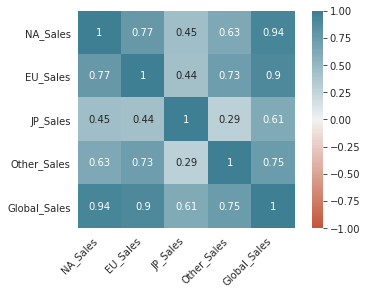

In [353]:
corr = corr_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#Most of the Global Sales of a video game seem to depend upon the sales in North America

#**Number of Genres**

In [354]:
Genre_df=pd.DataFrame(sales_df['Genre'].value_counts())
Genre_df

,Genre
Action,3251
Sports,2304
Misc,1686
Role-Playing,1470
Shooter,1282
Adventure,1274
Racing,1225
Platform,875
Simulation,848
Fighting,836


#**Number of Platforms**

In [355]:
Platform_df=pd.DataFrame(sales_df['Platform'].value_counts())
Platform_df

,Platform
DS,2131
PS2,2127
PS3,1304
Wii,1290
X360,1234
PSP,1197
PS,1189
PC,938
XB,803
GBA,786


#**Publisher v/s Year**

In [356]:
Publisher_df=pd.DataFrame(sales_df[['Publisher','Year']].value_counts())
Publisher_df.sort_values(by=['Year'],ascending=True,inplace=True)
Publisher_df

,,0
Publisher,Year,
Activision,1980,5
Atari,1980,4
Tigervision,1981,2
Mattel Interactive,1981,7
Activision,1981,6
...,...,...
Avanquest,2016,2
Insomniac Games,2016,3
Sega,2017,2


In [357]:
Publisher_df.head(10)

,,0
Publisher,Year,
Activision,1980,5
Atari,1980,4
Tigervision,1981,2
Mattel Interactive,1981,7
Activision,1981,6
20th Century Fox Video Games,1981,3
Starpath Corp.,1981,1
Unknown,1981,1
Imagic,1981,4


In [358]:
Publisher_df.tail(10)

,,0
Publisher,Year,
Aqua Plus,2016,3
Broccoli,2016,2
Namco Bandai Games,2016,40
Nippon Ichi Software,2016,12
Hello Games,2016,1
Avanquest,2016,2
Insomniac Games,2016,3
Sega,2017,2
Idea Factory,2017,1


#**Number of games in different genres released by each publisher**

In [359]:
percentage_df=pd.DataFrame(sales_df[['Publisher','Platform','Genre']].value_counts())
percentage_df.head(50)

0
Publisher                    Platform Genre            
Electronic Arts              PS2      Sports        101
                             X360     Sports         73
Ubisoft                      DS       Simulation     66
Konami Digital Entertainment PS2      Sports         65
Electronic Arts              PS3      Sports         64
                             XB       Sports         60
Sony Computer Entertainment  PS2      Misc           52
Idea Factory                 PSP      Adventure      47
Ubisoft                      Wii      Misc           46
Electronic Arts              PC       Simulation     45
Sony Computer Entertainment  PS2      Sports         45
Electronic Arts              GC       Sports         42
Activision                   X360     Action         42
Nintendo                     DS       Misc           40
Ubisoft                      DS       Misc           40
Namco Bandai Games           3DS      Action         40
Electronic Arts              PSP      Sports         40
Namco Bandai Games           DS       Action         39
Electronic Arts              PS       Sports         39
Namco Bandai Games           PS3      Action         39
THQ                          GBA      Action         38
Activision                   DS       Action         37
Take-Two Interactive         X360     Sports         36
Activision                   PS3      Action         36
Nintendo                     DS       Role-Playing   35
Sony Computer Entertainment  PS       Sports         34
                             PS3      Misc           33
Activision                   Wii      Action         33
Electronic Arts              Wii      Sports         32
Konami Digital Entertainment PS       Sports         32
Sony Computer Entertainment  PS3      Action         31
Activision                   X360     Shooter        31
Namco Bandai Games           PSP      Action         30
Tecmo Koei                   PS3      Action         30
Electronic Arts              X360     Action         30
                             PS2      Racing         29
Namco Bandai Games           DS       Role-Playing   29
Capcom                       PS2      Action         29
Konami Digital Entertainment PS2      Simulation     29
Electronic Arts              PS3      Action         28
Take-Two Interactive         PS3      Sports         28
Activision                   PS2      Action         28
Electronic Arts              DS       Simulation     27
Namco Bandai Games           PSP      Role-Playing   27
Nippon Ichi Software         PS3      Role-Playing   26
THQ                          DS       Action         26
                             PS2      Action         26
Namco Bandai Games           DS       Misc           26
Activision                   PS3      Shooter        26
THQ                          GBA      Platform       26

#**EA seems to have achieved highest sales in Sports genre in PS platform**

In [360]:
 filt=sales_df['Genre']=='Action'
 action_df=pd.DataFrame(sales_df.loc[filt]['Global_Sales'].value_counts())
 action_df

,Global_Sales
0.02,186
0.03,151
0.04,117
0.06,115
0.01,104
...,...
3.51,1
3.34,1
4.60,1
16.15,1


In [361]:
filt_1=sales_df['Genre']=='Action'
action_df=pd.DataFrame(sales_df.loc[filt_1]['Global_Sales'].value_counts())
action_df

,Global_Sales
0.02,186
0.03,151
0.04,117
0.06,115
0.01,104
...,...
3.51,1
3.34,1
4.60,1
16.15,1


In [362]:
sales_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


#**Total no. of Platforms**

Text(0.5, 1.0, 'Total no. of Platforms')

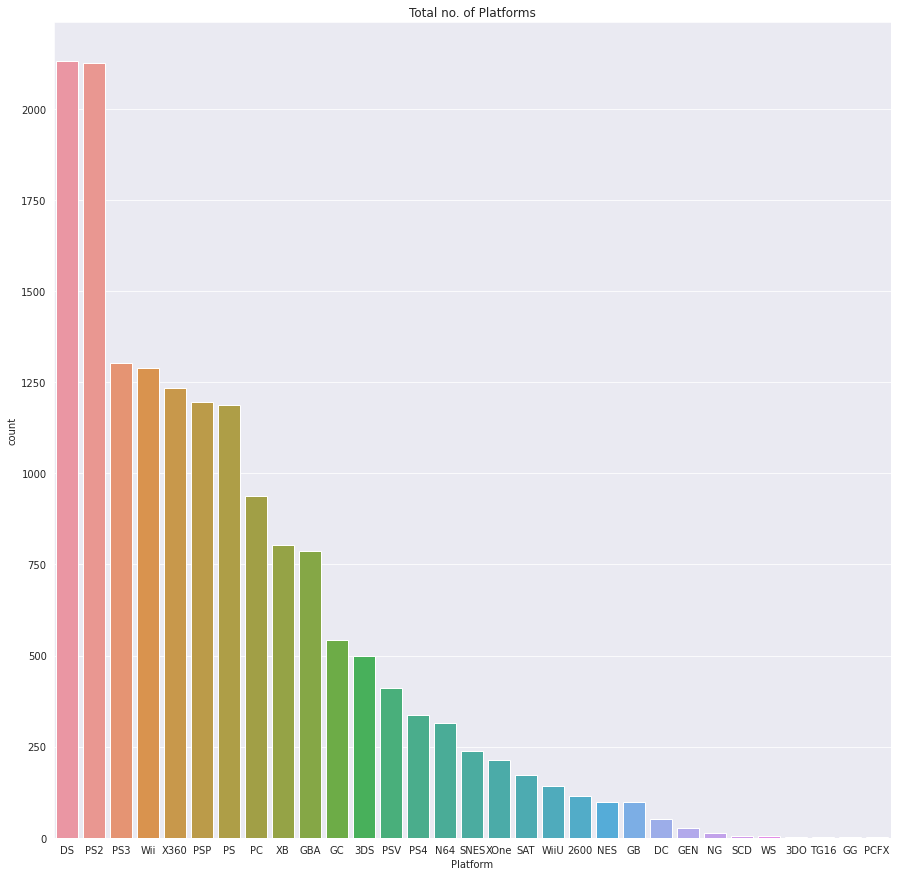

In [363]:
plt.figure(figsize=(15,15))
count=sns.countplot(x="Platform", data=sales_df, order = sales_df['Platform'].value_counts().index)
count.set_title('Total no. of Platforms')

#The DS platform has the highest count followed by PS2 and PS3 (Preferred Platforms).


#**Global Sales based on Genre**

In [364]:
genre_wise=sales_df[['Global_Sales','Genre']].groupby('Genre').sum()
genre_wise=genre_wise.reset_index()
genre_wise.sort_values(by=['Global_Sales'],ascending=False,inplace=True)

In [365]:
genre_wise

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76
2,Fighting,444.05
9,Simulation,389.98
5,Puzzle,242.21


Text(0.5, 1.0, 'Genre v/s Global Sales')

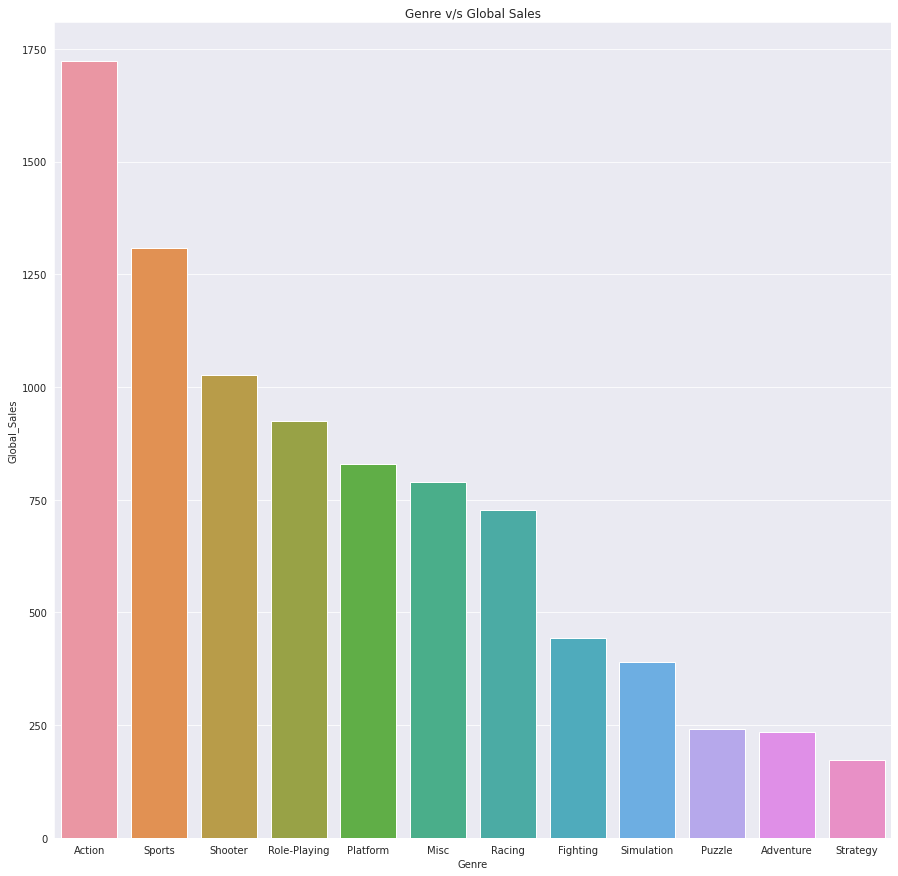

In [366]:
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
df1=sns.barplot(x=genre_wise.Genre,y=genre_wise.Global_Sales)
df1.set_title('Genre v/s Global Sales')

#Action is seen to be the preferred trend among the users followed by Sports.
#Strategy was not a popular choice.

#**Transition of Global Sales over Years**

In [367]:
year_wise=sales_df[['Global_Sales','Year']].groupby('Year').sum()
year_wise=year_wise.reset_index()
year_wise.sort_values(by=['Year'],ascending=True,inplace=True)

Text(0.5, 1.0, 'Global Sales through Years')

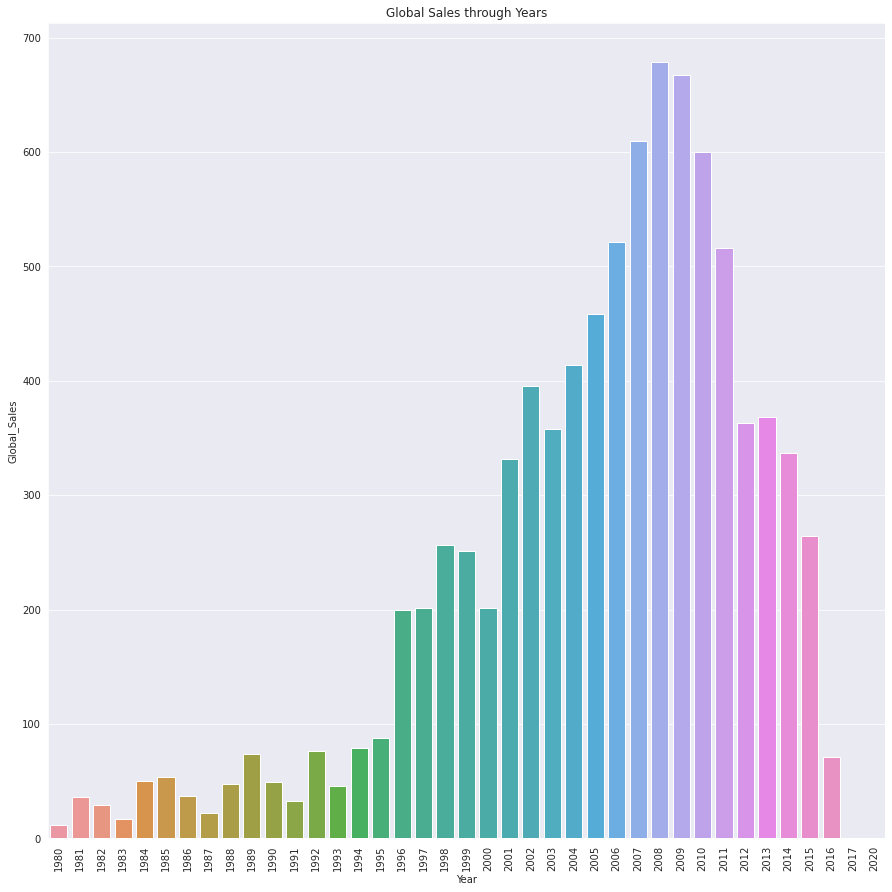

In [368]:
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
bar_plot=sns.barplot(x=year_wise.Year,y=year_wise.Global_Sales)
bar_plot.set_xticklabels(labels=year_wise.Year,rotation=90)
bar_plot.set_title('Global Sales through Years')

#Global Sales peaked in the period [2008-2009] when PS2 was on a boom!
#But a declining trend is observed in Global Sales from then on. 

In [369]:
sales_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


#**Scatter Plot of relation of the Global Sales with the Region-wise Sales**

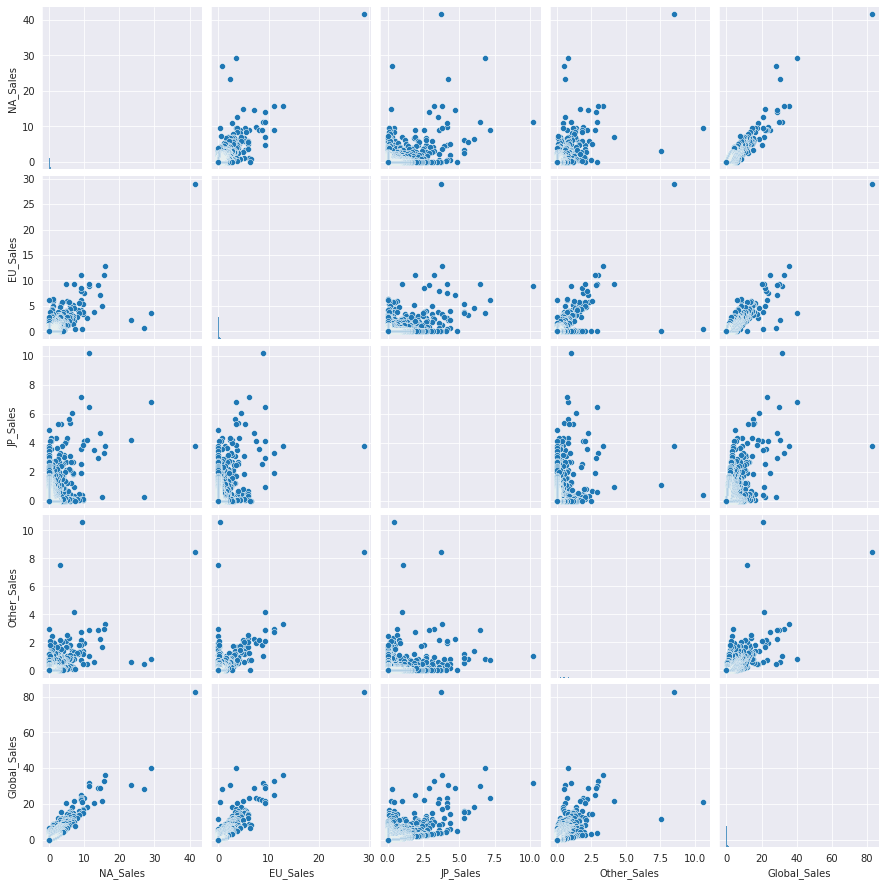

In [370]:
sns.pairplot(corr_df,kind='scatter',diag_kind='auto')

In [371]:
sales_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


#**Platform-wise Global Sales**

In [372]:
plat_wise=sales_df[['Global_Sales','Platform']].groupby('Platform').sum()
plat_wise=plat_wise.reset_index()
plat_wise.sort_values(by=['Global_Sales'],ascending=False,inplace=True)

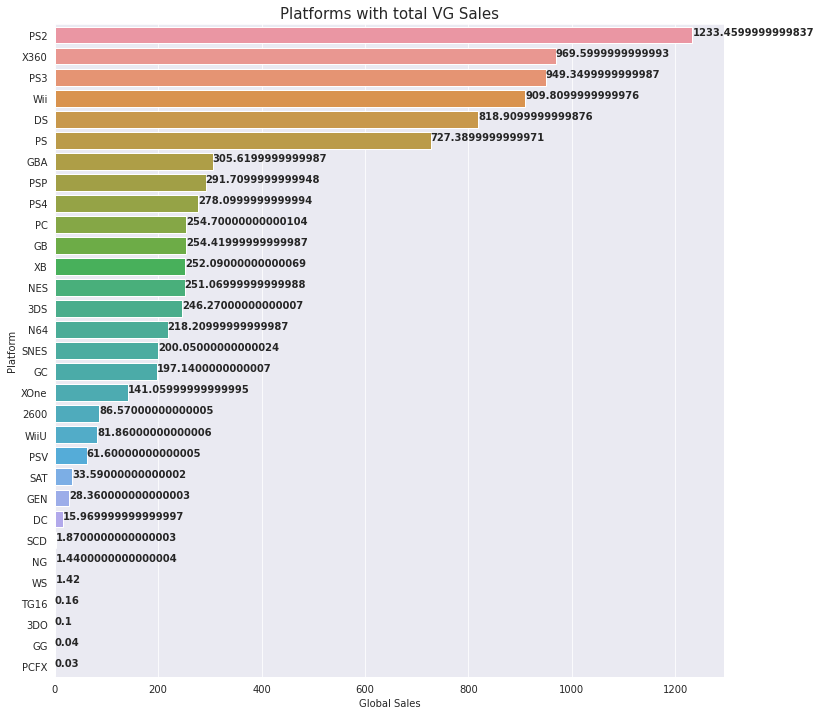

In [373]:
sns.set_style("darkgrid")
bar,ax = plt.subplots(figsize=(12,12))
ax = sns.barplot(x=plat_wise.Global_Sales, y=plat_wise.Platform, data=sales_df, ci=None,orient='h')
ax.set_title("Platforms with total VG Sales", fontsize=15)
ax.set_xlabel ("Global Sales")
ax.set_ylabel ("Platform")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,rect.get_width(),weight='bold' )

#The DS platform has the highest count followed by PS2 and PS3
#whereas the sales were on overall high across the globe for PS2.

#Quality and popularity of the games and the platform might have significantly improved !

In [374]:
sales_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [375]:
sales_pie=sales_df

In [376]:
sales_publisher=sales_pie['Publisher'].value_counts()

In [377]:
sales_publisher=pd.DataFrame(sales_publisher)

In [378]:
sales_publisher=sales_publisher[sales_publisher['Publisher']>100]

In [379]:
sales_publisher.size

28

In [380]:
sales_pub=sales_df.head(1000)

#****Focus on Top 1000 Video Games****

#**Top Publishers**

In [381]:
pub_wise=sales_pub[['Global_Sales','Publisher']].groupby('Publisher').sum()
pub_wise=pub_wise.reset_index()
pub_wise.sort_values(by=['Publisher'],ascending=False,inplace=True)

Text(0.5, 1.0, 'Top Publishers w.r.t. Global Sales')

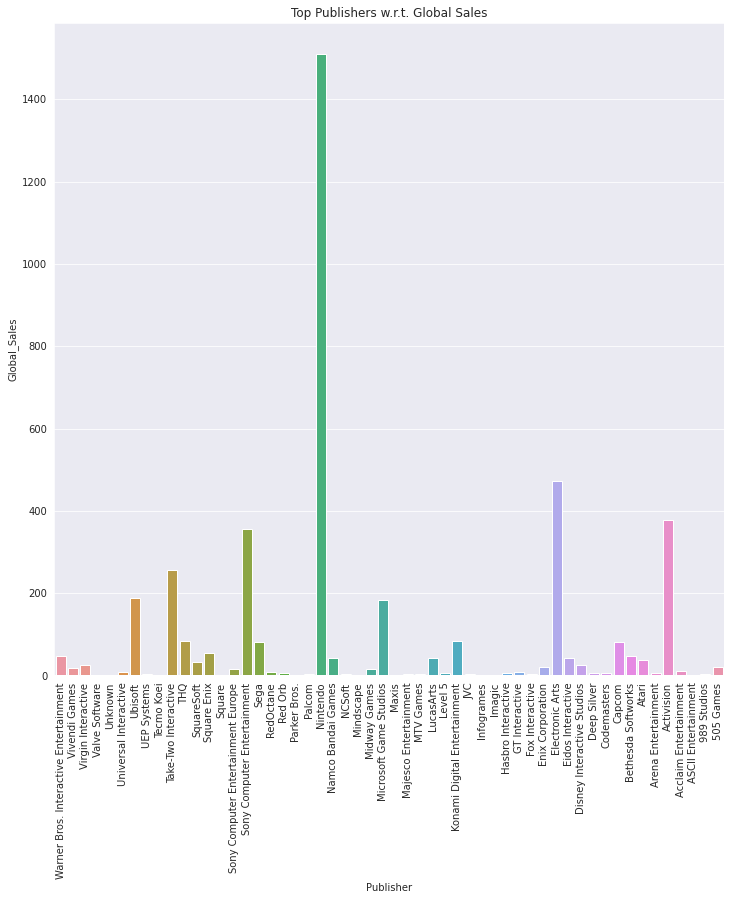

In [382]:
plt.figure(figsize=(12,12))
sns.set_style('darkgrid')
bar_plot=sns.barplot(x=pub_wise.Publisher,y=pub_wise.Global_Sales)
bar_plot.set_xticklabels(labels=pub_wise.Publisher,rotation=90)
bar_plot.set_title('Top Publishers w.r.t. Global Sales')

#Nintendo publishers are the clear winners in terms of Global Sales of Top 1000 Video Games!! 

In [383]:
sales_wise=sales_pub[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year']].groupby('Year').sum()
sales_wise=sales_wise.reset_index()
sales_wise.sort_values(by=['Year'],ascending=True,inplace=True)

In [384]:
sales_wise.set_index('Year',inplace=True)
sales_wise

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,6.56,0.43,0.00,0.08
1981,10.10,0.59,0.00,0.11
1982,7.28,0.45,0.00,0.08
1983,1.25,0.22,6.11,0.04
1984,31.47,1.69,6.70,0.63
1985,30.90,4.19,9.76,0.85
1986,9.29,2.18,10.09,1.84
1987,5.28,1.18,7.87,0.18
1988,20.74,6.01,11.09,0.91


#**Region-wise Sales of Top 1000 Video Games**

Text(0.5, 1.0, 'Sales over Years (Top 1000) ----> Region-wise')

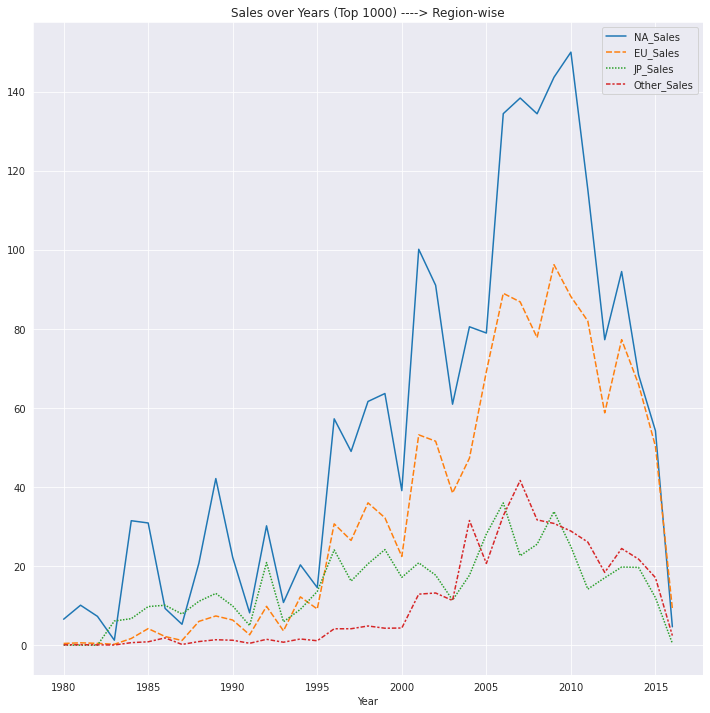

In [385]:
plt.figure(figsize=(12,12))
sns.set_style('darkgrid')
line_plot=sns.lineplot(data=sales_wise[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']])
line_plot.set_title('Sales over Years (Top 1000) ----> Region-wise')

#Sales in North America < Europe < Japan < Other Sales

#North America has had high sales always over years and contributed highly to Global Sales.

#Recent decline in Sales globally and in all regions. 

#Sales in most regions increased briefly after 2000's

In [386]:
sales_publisher.reset_index()

,index,Publisher
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,632
9,Take-Two Interactive,412


#**Publishers with over 100 VG Sales**

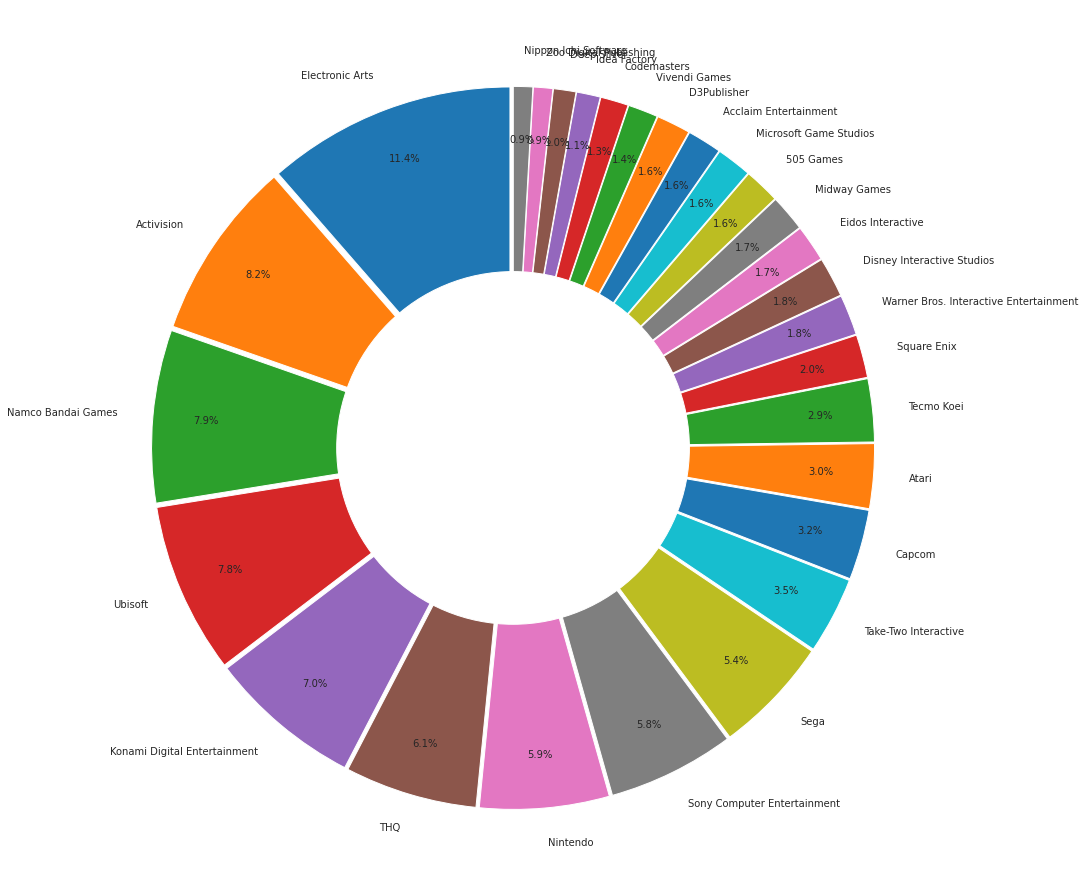

In [387]:
plt.figure(figsize=(15,15))
ax=plt.pie(x=sales_publisher.Publisher,labels=sales_publisher.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = [0.025]*28,data=sales_publisher['Publisher'])
centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

#EA has the highest Video Game Releases (11.4 %) among publishers who have min. more than 100 releases! 

In [388]:
sales_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


#**Genre-wise collection globally across all Regions**

In [389]:
Genre_list=list(sales_df.Genre.unique())
NA_sales=[]
EU_sales=[]
JP_sales=[]
Other_sales=[]
Global_sales=[]
for i in Genre_list:
    val=sales_df[sales_df.Genre==i]
    NA_sales.append(val.NA_Sales.mean())
    EU_sales.append(val.EU_Sales.mean())
    JP_sales.append(val.JP_Sales.mean())
    Other_sales.append(val.Other_Sales.mean())
    Global_sales.append(val.Global_Sales.mean())

In [390]:
reg_df=pd.DataFrame({"Genre":Genre_list,"NA_Sales":NA_sales,"EU_Sales":EU_sales,"JP_Sales":JP_sales,"Other_Sales":Other_sales,"Global_Sales":Global_sales})

In [391]:
reg_df

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,0.290838,0.161172,0.058490,0.057574,0.568247
1,Platform,0.509703,0.229314,0.149314,0.058869,0.947577
2,Racing,0.291371,0.192906,0.046212,0.062596,0.593273
3,Role-Playing,0.222109,0.127599,0.238293,0.040395,0.628456
4,Puzzle,0.214053,0.088632,0.099439,0.021877,0.424930
5,Misc,0.235421,0.125605,0.063268,0.043843,0.468488
6,Shooter,0.448643,0.242161,0.029782,0.079485,0.800468
7,Simulation,0.214363,0.133278,0.074929,0.036981,0.459882
8,Action,0.265078,0.158868,0.048800,0.056881,0.529942
9,Fighting,0.264043,0.119617,0.104246,0.043289,0.531160


#**North America Genre-wise Sales Analysis**

In [392]:
genre_wise_NA=sales_df[['Genre','NA_Sales']].groupby('Genre').sum()
genre_wise_NA=genre_wise_NA.reset_index()
genre_wise_NA.sort_values(by=['Genre'],ascending=True,inplace=True)

In [393]:
genre_wise_NA

,Genre,NA_Sales
0,Action,861.77
1,Adventure,101.93
2,Fighting,220.74
3,Misc,396.92
4,Platform,445.99
5,Puzzle,122.01
6,Racing,356.93
7,Role-Playing,326.50
8,Shooter,575.16
9,Simulation,181.78


#**Popular 1000 Game titles/Publishers/Genre in North America**

In [394]:
game_wise_NA=sales_df.sort_values(by=['NA_Sales'],ascending=False)

In [395]:
game_NA_1000=game_wise_NA.head(1000)

In [396]:
platform_NA=pd.DataFrame(game_NA_1000['Platform'].value_counts())
platform_NA

,Platform
PS2,162
X360,145
PS,99
Wii,89
PS3,88
DS,63
PC,36
N64,36
GBA,35
XB,30


In [397]:
platform_NA.reset_index()

,index,Platform
0,PS2,162
1,X360,145
2,PS,99
3,Wii,89
4,PS3,88
5,DS,63
6,PC,36
7,N64,36
8,GBA,35
9,XB,30


[Text(0, 0, '162'),
 Text(0, 0, '145'),
 Text(0, 0, '99'),
 Text(0, 0, '89'),
 Text(0, 0, '88'),
 Text(0, 0, '63'),
 Text(0, 0, '36'),
 Text(0, 0, '36'),
 Text(0, 0, '35'),
 Text(0, 0, '30')]

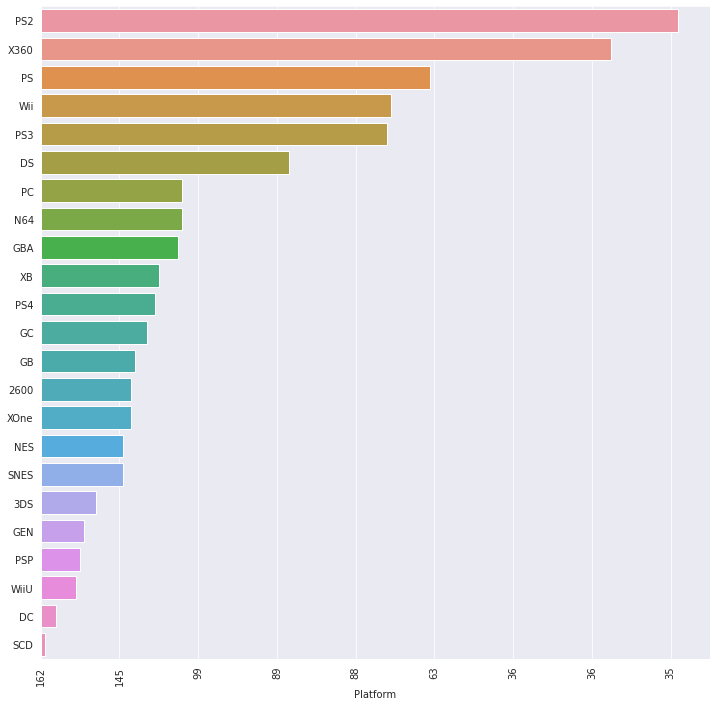

In [398]:
plt.figure(figsize=(12,12))
sns.set_style('darkgrid')
bar_plot=sns.barplot(x=platform_NA.Platform,y=platform_NA.index,data=platform_NA)
bar_plot.set_xticklabels(labels=platform_NA.Platform,rotation=90)

In [399]:
game_NA_1000['Publisher'].value_counts()

Nintendo                                  184
Electronic Arts                           156
Activision                                 89
Sony Computer Entertainment                81
Take-Two Interactive                       57
Ubisoft                                    51
THQ                                        44
Microsoft Game Studios                     41
Sega                                       32
Atari                                      27
Warner Bros. Interactive Entertainment     22
Capcom                                     18
LucasArts                                  18
Konami Digital Entertainment               18
Namco Bandai Games                         16
Disney Interactive Studios                 16
Eidos Interactive                          12
Acclaim Entertainment                      11
Bethesda Softworks                         10
Virgin Interactive                          8
Midway Games                                8
Square Enix                       

In [400]:
genre_NA=pd.DataFrame(game_NA_1000['Genre'].value_counts())
genre_NA

,Genre
Action,202
Sports,142
Shooter,141
Platform,109
Misc,90
Racing,80
Role-Playing,73
Fighting,67
Simulation,41
Puzzle,23


In [401]:
genre_NA.reset_index()

,index,Genre
0,Action,202
1,Sports,142
2,Shooter,141
3,Platform,109
4,Misc,90
5,Racing,80
6,Role-Playing,73
7,Fighting,67
8,Simulation,41
9,Puzzle,23


[Text(0, 0, 'Action'),
 Text(0, 0, 'Sports'),
 Text(0, 0, 'Shooter'),
 Text(0, 0, 'Platform'),
 Text(0, 0, 'Misc'),
 Text(0, 0, 'Racing'),
 Text(0, 0, 'Role-Playing'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Simulation'),
 Text(0, 0, 'Puzzle'),
 Text(0, 0, 'Strategy'),
 Text(0, 0, 'Adventure')]

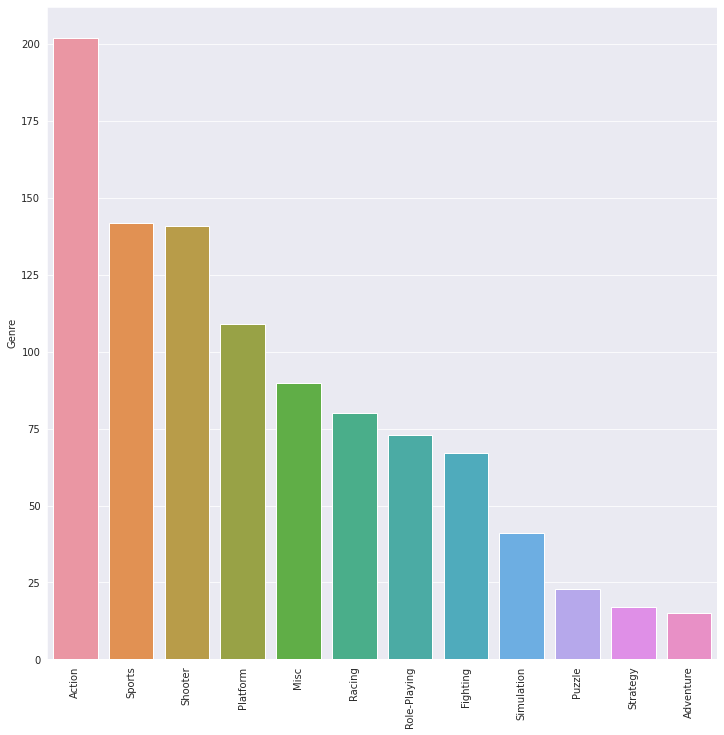

In [402]:
plt.figure(figsize=(12,12))
sns.set_style('darkgrid')
bar_plot=sns.barplot(x=genre_NA.index,y=genre_NA.Genre,data=genre_NA)
bar_plot.set_xticklabels(labels=genre_NA.index,rotation=90)

#Nintendo is the most popular publisher in North America (9/10)
#9 out of the top 10 games are from Nintendo

#but,in top 1000,

#PS2 and X360 are the widely used Platforms in North America

#Electronic Arts (EA) is the popular Publisher 

#Action is the preferred Genre followed by Shooting

#**Popular 1000 Game titles/Publisher/Genre in Europe**

In [403]:
game_wise_EU=sales_df.sort_values(by=['EU_Sales'],ascending=False)

In [404]:
game_EU_1000=game_wise_EU.head(1000)

In [405]:
platform_EU=pd.DataFrame(game_EU_1000['Platform'].value_counts())
platform_EU

,Platform
PS3,151
PS2,149
X360,128
Wii,95
PS,81
DS,74
PC,64
PS4,63
PSP,27
XOne,26


In [406]:
platform_NA.reset_index()

,index,Platform
0,PS2,162
1,X360,145
2,PS,99
3,Wii,89
4,PS3,88
5,DS,63
6,PC,36
7,N64,36
8,GBA,35
9,XB,30


[Text(0, 0, '151'),
 Text(0, 0, '149'),
 Text(0, 0, '128'),
 Text(0, 0, '95'),
 Text(0, 0, '81'),
 Text(0, 0, '74'),
 Text(0, 0, '64'),
 Text(0, 0, '63'),
 Text(0, 0, '27')]

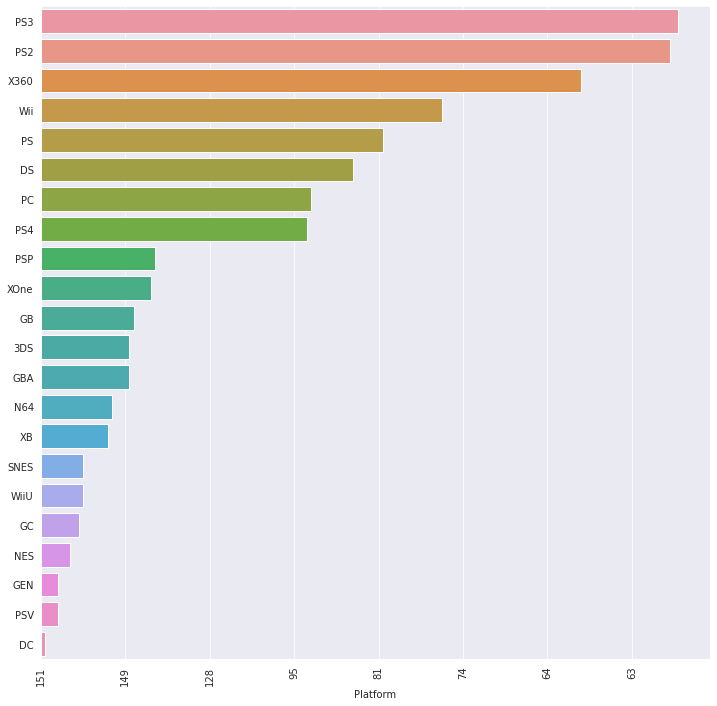

In [407]:
plt.figure(figsize=(12,12))
sns.set_style('darkgrid')
bar_plot=sns.barplot(x=platform_EU.Platform,y=platform_EU.index,data=platform_EU)
bar_plot.set_xticklabels(labels=platform_EU.Platform,rotation=90)

In [408]:
game_EU_1000['Publisher'].value_counts()

Electronic Arts                           173
Nintendo                                  153
Sony Computer Entertainment                92
Activision                                 86
Ubisoft                                    79
Take-Two Interactive                       55
Sega                                       39
Microsoft Game Studios                     37
THQ                                        35
Konami Digital Entertainment               29
Warner Bros. Interactive Entertainment     20
Capcom                                     19
Bethesda Softworks                         18
LucasArts                                  16
Square Enix                                16
Eidos Interactive                          16
Codemasters                                15
Namco Bandai Games                         13
Disney Interactive Studios                 10
Vivendi Games                               7
Sony Computer Entertainment Europe          6
Virgin Interactive                

In [409]:
genre_EU=pd.DataFrame(game_EU_1000['Genre'].value_counts())
genre_EU

,Genre
Action,227
Shooter,147
Sports,129
Racing,98
Platform,95
Misc,92
Role-Playing,67
Simulation,53
Fighting,38
Adventure,21


In [410]:
genre_EU.reset_index()

,index,Genre
0,Action,227
1,Shooter,147
2,Sports,129
3,Racing,98
4,Platform,95
5,Misc,92
6,Role-Playing,67
7,Simulation,53
8,Fighting,38
9,Adventure,21


[Text(0, 0, 'Action'),
 Text(0, 0, 'Shooter'),
 Text(0, 0, 'Sports'),
 Text(0, 0, 'Racing'),
 Text(0, 0, 'Platform'),
 Text(0, 0, 'Misc'),
 Text(0, 0, 'Role-Playing'),
 Text(0, 0, 'Simulation'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Puzzle'),
 Text(0, 0, 'Strategy')]

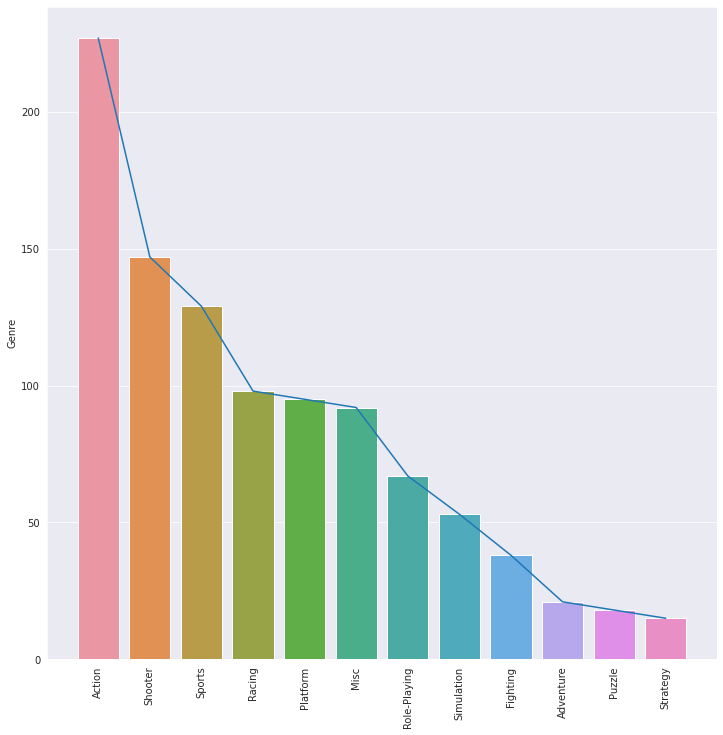

In [411]:
plt.figure(figsize=(12,12))
sns.set_style('darkgrid')
bar_plot=sns.barplot(x=genre_EU.index,y=genre_EU.Genre,data=genre_EU)
line_plot=sns.lineplot(x=genre_EU.index,y=genre_EU.Genre,data=genre_EU)
bar_plot.set_xticklabels(labels=genre_EU.index,rotation=90)

#Nintendo is the most popular publisher in Europe (9/10)
#9 out of the top 10 games are from Nintendo

#but,in top 1000,

#PS3 and PS2 seem to be close competitors with X360 not far behind

#Electronic Arts (EA) and Nintendo are on top in terms of Europe Sales

#Genre preference is the same as North America (Action and Shooting)

#**Popular 1000 Game titles/Publishers/Genre in Japan** 

In [412]:
game_wise_JP=sales_df.sort_values(by=['JP_Sales'],ascending=False)

In [413]:
game_JP_1000=game_wise_JP.head(1000)

In [414]:
platform_JP=pd.DataFrame(game_JP_1000['Platform'].value_counts())
platform_JP

,Platform
PS,137
PS2,133
SNES,114
DS,108
NES,81
GB,65
PS3,62
3DS,61
Wii,42
PSP,41


In [415]:
platform_JP.reset_index()

,index,Platform
0,PS,137
1,PS2,133
2,SNES,114
3,DS,108
4,NES,81
5,GB,65
6,PS3,62
7,3DS,61
8,Wii,42
9,PSP,41


[Text(0, 0, 'PS'),
 Text(0, 0, 'PS2'),
 Text(0, 0, 'SNES'),
 Text(0, 0, 'DS'),
 Text(0, 0, 'NES'),
 Text(0, 0, 'GB'),
 Text(0, 0, 'PS3'),
 Text(0, 0, '3DS'),
 Text(0, 0, 'Wii'),
 Text(0, 0, 'PSP'),
 Text(0, 0, 'GBA'),
 Text(0, 0, 'SAT'),
 Text(0, 0, 'N64'),
 Text(0, 0, 'GC'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'WiiU'),
 Text(0, 0, 'PS4'),
 Text(0, 0, 'PSV'),
 Text(0, 0, 'WS'),
 Text(0, 0, 'GEN')]

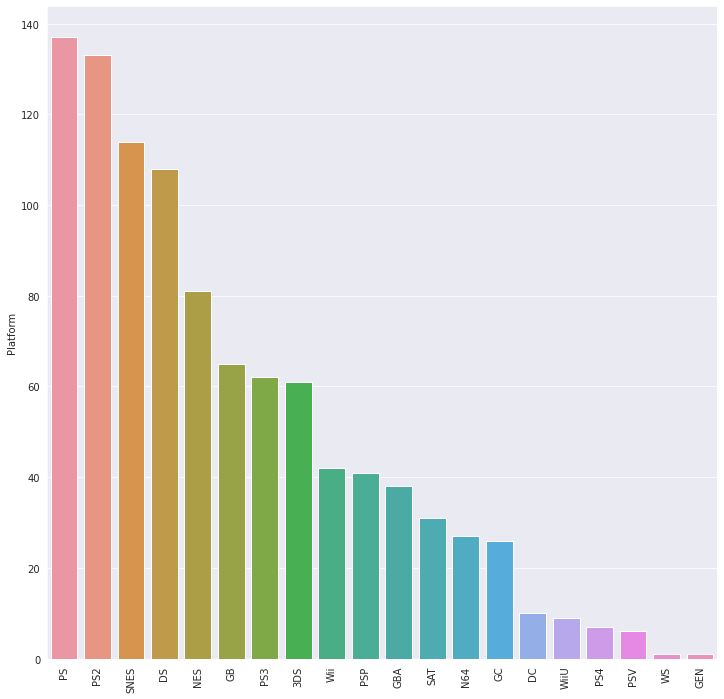

In [416]:
plt.figure(figsize=(12,12))
sns.set_style('darkgrid')
bar_plot=sns.barplot(x=platform_JP.index,y=platform_JP.Platform,data=platform_JP)
bar_plot.set_xticklabels(labels=platform_JP.index,rotation=90)

In [417]:
game_JP_1000['Publisher'].value_counts()

Nintendo                              328
Namco Bandai Games                    123
Konami Digital Entertainment           78
Sony Computer Entertainment            65
Capcom                                 56
Sega                                   49
Square Enix                            43
SquareSoft                             36
Hudson Soft                            23
Tecmo Koei                             23
Enix Corporation                       18
Banpresto                              18
Atari                                  13
ASCII Entertainment                    10
Virgin Interactive                      9
Level 5                                 9
Atlus                                   7
Activision                              6
Takara                                  5
ChunSoft                                5
Take-Two Interactive                    5
Electronic Arts                         5
Human Entertainment                     4
Sony Computer Entertainment Europe

In [418]:
genre_JP=pd.DataFrame(game_JP_1000['Genre'].value_counts())
genre_JP

,Genre
Role-Playing,240
Action,127
Sports,105
Platform,104
Misc,85
Fighting,83
Puzzle,54
Strategy,50
Simulation,50
Racing,42


In [419]:
genre_JP.reset_index()

,index,Genre
0,Role-Playing,240
1,Action,127
2,Sports,105
3,Platform,104
4,Misc,85
5,Fighting,83
6,Puzzle,54
7,Strategy,50
8,Simulation,50
9,Racing,42


[Text(0, 0, 'Role-Playing'),
 Text(0, 0, 'Action'),
 Text(0, 0, 'Sports'),
 Text(0, 0, 'Platform'),
 Text(0, 0, 'Misc'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Puzzle'),
 Text(0, 0, 'Strategy'),
 Text(0, 0, 'Simulation'),
 Text(0, 0, 'Racing'),
 Text(0, 0, 'Shooter'),
 Text(0, 0, 'Adventure')]

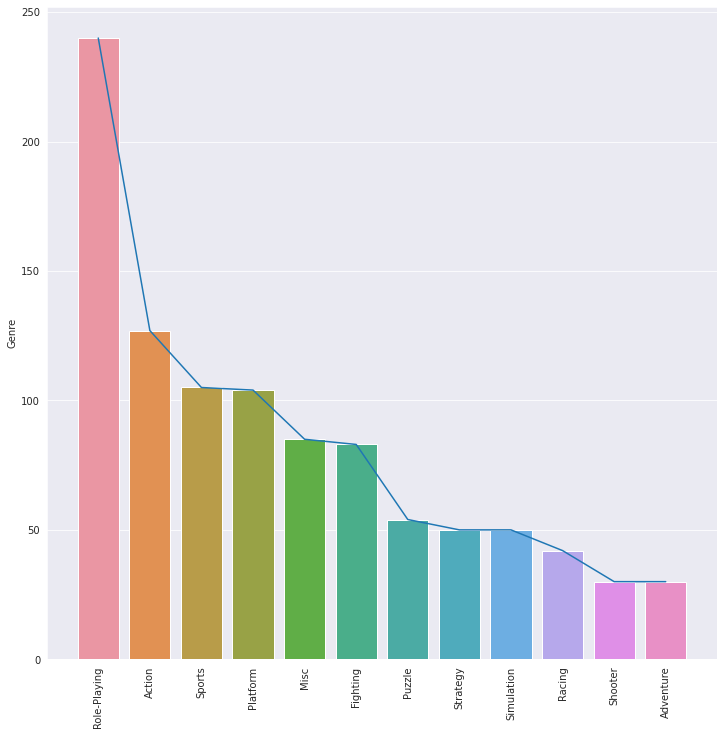

In [420]:
plt.figure(figsize=(12,12))
sns.set_style('darkgrid')
bar_plot=sns.barplot(x=genre_JP.index,y=genre_JP.Genre,data=genre_JP)
line_plot=sns.lineplot(x=genre_JP.index,y=genre_JP.Genre,data=genre_JP)
bar_plot.set_xticklabels(labels=genre_JP.index,rotation=90)

#Nintendo is the outright winner among top publishers in Japan

#Platform PS,PS2 and SNES are in close competition

#But,unlike North America and Europe,Role-Playing seems to be the most popular Genre in Japan! 

In [421]:
sales_df.drop('Name',axis=1,inplace=True)

In [422]:
sales_df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,
1,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16596,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [423]:
sales_df['Platform'] = sales_df['Platform'].astype('category')
sales_df['Genre'] = sales_df['Genre'].astype('category')
sales_df['Publisher'] = sales_df['Publisher'].astype('category')

In [424]:
sales_df.dtypes

Platform        category
Year               int64
Genre           category
Publisher       category
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
Global_Sales     float64
dtype: object

In [425]:
X = sales_df.iloc[:, :-1].values
y = sales_df.iloc[:, -1].values

In [426]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])
X[:,2]=le.fit_transform(X[:,2])
X[:,3]=le.fit_transform(X[:,3])

In [427]:
X_df=pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7
0,26,2006,10,359,41.49,29.02,3.77,8.46
1,11,1985,4,359,29.08,3.58,6.81,0.77
2,26,2008,6,359,15.85,12.88,3.79,3.31
3,26,2009,10,359,15.75,11.01,3.28,2.96
4,5,1996,7,359,11.27,8.89,10.22,1
...,...,...,...,...,...,...,...,...
16286,6,2002,4,269,0.01,0,0,0
16287,7,2003,8,241,0.01,0,0,0
16288,16,2008,6,21,0,0,0,0
16289,4,2010,5,8,0,0.01,0,0


In [428]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [429]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [430]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13032, 8)
(3259, 8)
(13032,)
(3259,)


In [431]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 0.15  1.14 -0.25 ...  0.52 -0.26  0.49]
 [-0.09 -1.26 -1.04 ... -0.32  0.07 -0.2 ]
 [ 0.15  1.31 -1.31 ...  0.46 -0.26  0.44]
 ...
 [-0.09 -1.77  0.82 ... -0.12 -0.26 -0.15]
 [ 0.03 -1.09  1.08 ...  0.17  0.51  0.12]
 [ 0.03 -0.74  1.35 ... -0.14 -0.26 -0.1 ]]
[[ 0.39  0.45  0.55 ... -0.32  0.84 -0.26]
 [-1.41  0.62  1.08 ... -0.32 -0.26 -0.26]
 [-1.41  0.62  1.08 ... -0.3  -0.26 -0.26]
 ...
 [ 0.39 -0.06 -1.31 ...  0.81 -0.26  1.45]
 [-0.09 -1.09  1.35 ... -0.05 -0.26 -0.15]
 [ 0.27  1.65  1.08 ... -0.32 -0.19 -0.26]]
[0.66 0.11 0.81 ... 0.25 0.79 0.21]
[0.33 0.06 0.05 ... 1.41 0.32 0.02]


In [432]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [433]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.33 0.33]
 [0.06 0.06]
 [0.05 0.05]
 ...
 [1.41 1.41]
 [0.32 0.32]
 [0.02 0.02]]


In [434]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9999938811879376


In [435]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

2.693324742055639e-05
